In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import seaborn as sns

In [127]:
data=pd.read_csv('clean.csv',delimiter=';')

In [128]:
data.head()

,Sources,Flux,Distance,Temp,Mgas,Mgas_E,Ngas,Ngas_E,T(CH3OH),N(CH3OH),T(CH3CCH),N(CH3CCH),T(CH3CN),N(CH3CN)
0,G013.6562-00.5997,239.17,4.1,500,12.18,0.06,2.35×1024,1.25×1022,250.00 ( 10.00 ),230.00 ( 10.00 ),40.00(5.00),1.60(0.10),500.00(10.00),11.00(1.00)
1,G017.6380+00.1566,97.93,2.2,200,3.65,0.04,2.45×1024,2.51×1022,150.00 ( 10.00 ),4.80 ( 0.30 ),40.00(2.00),0.15(0.01),200.00(20.00),0.10(0.01)
2,G023.3891+00.1851,132.62,4.5,350,11.68,0.06,1.87×1024,9.67×1021,220.00 ( 20.00 ),280.00 ( 20.00 ),50.00(1.00),0.75(0.05),350.00(5.00),1.10(0.50)
3,G029.8620-00.0444,59.45,4.9,270,8.09,0.09,1.09×1024,1.21×1022,200.00 ( 20.00 ),10.00 ( 0.50 ),60.00(5.00),0.50(0.01),270.00(30.00),0.25(0.01)
4,G030.1981-00.1691,76.56,4.9,200,14.17,0.09,1.92×1024,1.29×1022,360.00 ( 30.00 ),40.00 ( 1.00 ),30.00(2.00),0.95(0.05),200.00(10.00),0.50(0.02)


In [169]:
data['ngas']=[float(i[:4]+'e'+i[-2:]) for i in data.Ngas] 

In [170]:
data['T_CH3OH']=[float(i[:6]) for i in data['T(CH3OH)']]

In [171]:
data['N_CH3OH']=[float(i[:5]) for i in data['N(CH3OH)']]

In [172]:
data['T_CH3CCH']=[float(i[:5]) for i in data['T(CH3CCH)']]

In [173]:
data['N_CH3CCH']=[float(i[:4]) for i in data['N(CH3CCH)']]

In [174]:
data['T_CH3CN']=[float(i[:5]) for i in data['T(CH3CN)']]

In [175]:
data['N_CH3CN']=[float(i[:4]) for i in data['N(CH3CN)']]

In [176]:
data.columns

Index(['Sources', 'Flux', 'Distance', 'Temp', 'Mgas', 'Mgas_E', 'Ngas',
       'Ngas_E', 'T(CH3OH)', 'N(CH3OH)', 'T(CH3CCH)', 'N(CH3CCH)', 'T(CH3CN)',
       'N(CH3CN)', 'ngas', 'T_CH3OH', 'N_CH3OH', 'T_CH3CCH', 'N_CH3CCH',
       'T_CH3CN', 'N_CH3CN'],
      dtype='object')

In [177]:
selec=data[['Temp', 'Mgas',
        'ngas', 'T_CH3OH', 'N_CH3OH', 'T_CH3CCH', 'N_CH3CCH',
       'T_CH3CN', 'N_CH3CN']]

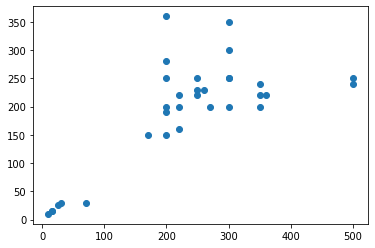

In [342]:
plt.scatter(selec.Temp,selec.T_CH3OH)

In [181]:
from sklearn.preprocessing import MinMaxScaler
  
scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(selec.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Temp', 'Mgas',
        'ngas', 'T_CH3OH', 'N_CH3OH', 'T_CH3CCH', 'N_CH3CCH',
       'T_CH3CN', 'N_CH3CN'])
 
print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()

Scaled Dataset Using MinMaxScaler


,Temp,Mgas,ngas,T_CH3OH,N_CH3OH,T_CH3CCH,N_CH3CCH,T_CH3CN,N_CH3CN
0,1.000000,0.134799,0.071797,0.685714,0.229946,0.333333,0.441176,1.000000,1.000000
1,0.387755,0.039139,0.074886,0.400000,0.004730,0.333333,0.014706,0.387755,0.009091
2,0.693878,0.129191,0.056971,0.600000,0.279950,0.444444,0.191176,0.693878,0.100000
3,0.530612,0.088931,0.032878,0.542857,0.009931,0.555556,0.117647,0.530612,0.022727
4,0.387755,0.157116,0.058515,1.000000,0.039933,0.222222,0.250000,0.387755,0.045455


In [214]:
pca=PCA(0.95)
pca.fit(df_scaled)

print(pca.explained_variance_ratio_)

[0.49605347 0.22889161 0.09790112 0.06674409 0.03992268]


In [186]:
comp=pca.fit_transform(df_scaled)

In [202]:
ncomp=comp.shape[1]

In [226]:
principalDf = pd.DataFrame(data = comp
             , columns = ['pc'+str(i) for i in range(ncomp)])

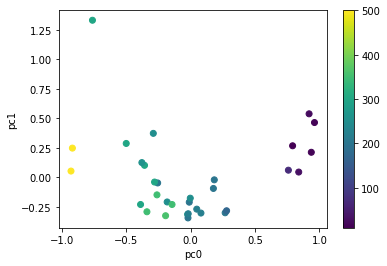

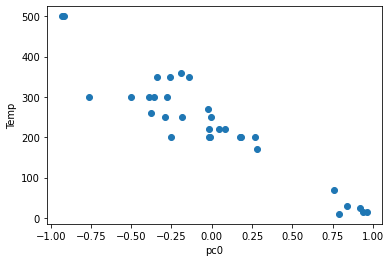

Text(0, 0.5, 'ngas')

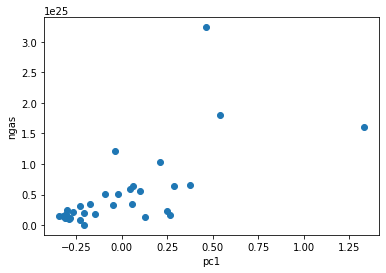

In [362]:
plt.scatter(comp[:,0],comp[:,1],c=selec.Temp)
plt.xlabel('pc0')
plt.ylabel('pc1')
plt.colorbar()
plt.show()

plt.scatter(comp[:,0],selec.Temp)
plt.xlabel('pc0')
plt.ylabel('Temp')

plt.show()
plt.scatter(comp[:,1],selec.ngas)
plt.xlabel('pc1')
plt.ylabel('ngas')


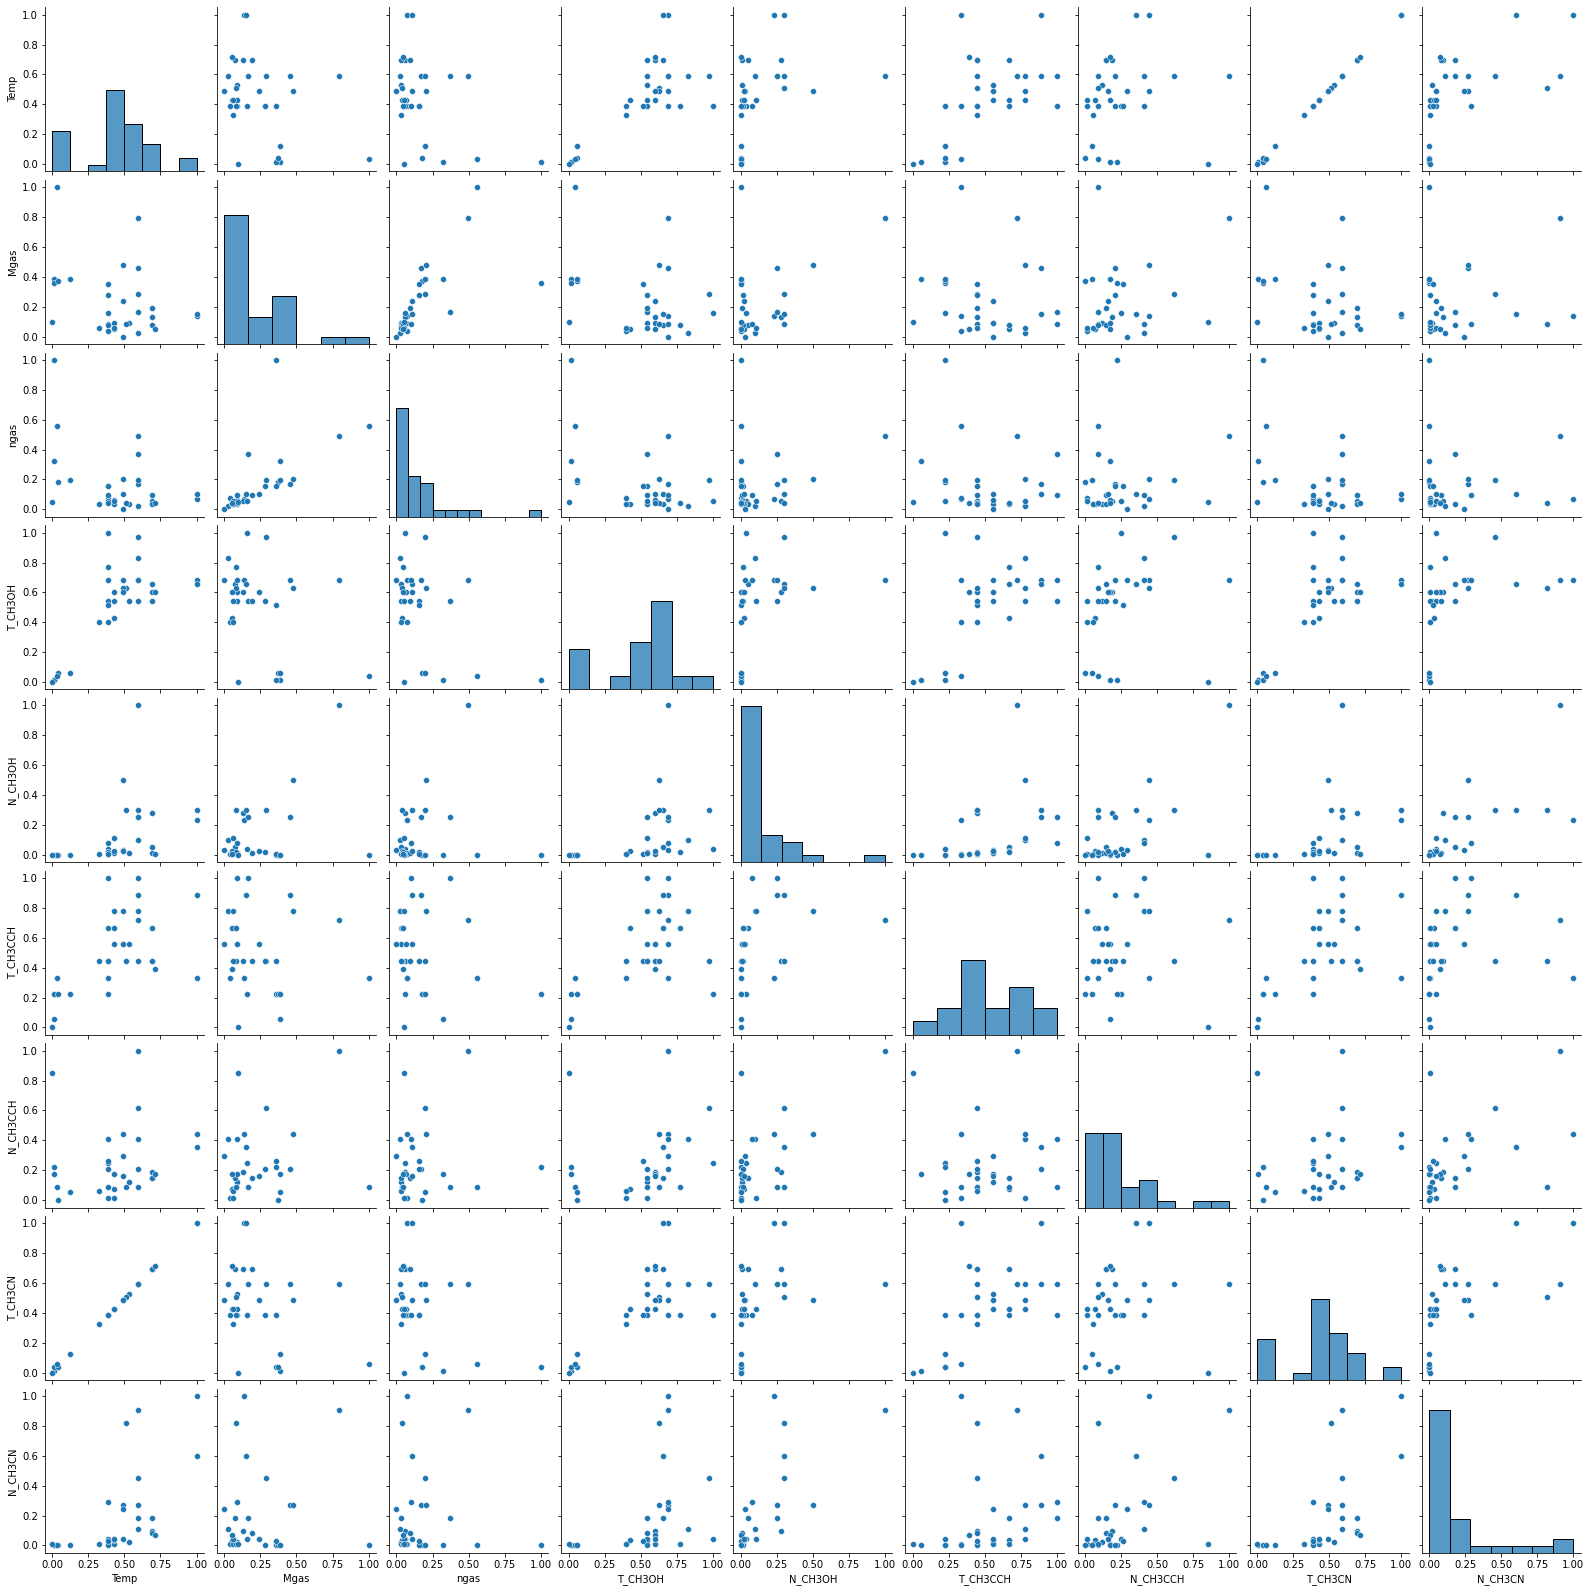

In [224]:
sns.pairplot(df_scaled)

In [228]:
principalDf

,pc0,pc1,pc2,pc3,pc4,pc5
0,-0.917139,0.248639,0.530115,0.436070,-0.023649,-0.012198
1,0.268398,-0.298712,0.106610,0.102920,-0.022838,0.023860
2,-0.260812,-0.147055,0.076463,0.093078,0.111777,-0.102669
3,-0.023140,-0.312918,-0.019197,0.021338,0.007486,-0.049608
4,-0.010223,-0.208939,0.223844,-0.250944,0.389420,0.172337
5,-0.338712,-0.290183,-0.037121,0.081804,0.003824,-0.066046
6,0.048054,-0.268020,-0.023875,-0.103373,0.012647,-0.006252
7,0.937009,0.213340,0.162624,0.084967,-0.026995,0.043023
8,0.961714,0.465073,-0.150191,0.167508,-0.023188,-0.269879
9,-0.357346,0.102840,-0.357244,0.008842,0.051489,0.061404


In [229]:
from sklearn.mixture import GaussianMixture as GMM

In [305]:
ran=range(2,20)
bic=[]
for i in ran:
    gmm=GMM(i)
    gmm.fit(principalDf)
    bic+=[gmm.bic(principalDf)]

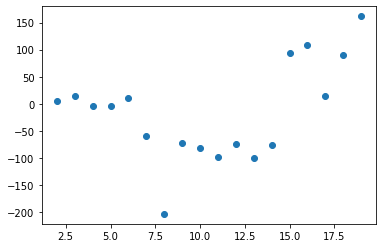

In [306]:
plt.scatter(ran,bic)

In [286]:
gmm=GMM(3)
fit=gmm.fit(principalDf)

In [287]:
pred=fit.predict(principalDf)

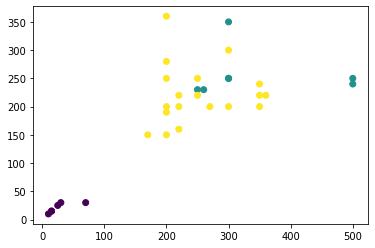

In [288]:
plt.scatter(selec.Temp,selec.T_CH3OH,c=pred)

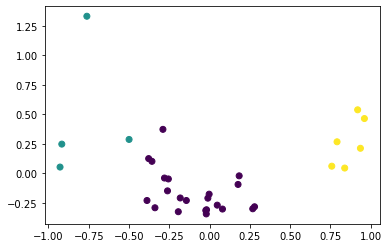

In [285]:
plt.scatter(principalDf.pc0,principalDf.pc1,c=pred)

In [307]:
ran=range(2,20)
bic=[]
for i in ran:
    gmm=GMM(i)
    gmm.fit(df_scaled)
    bic+=[gmm.aic(df_scaled)]

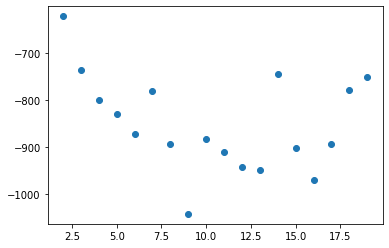

In [308]:
plt.scatter(ran,bic)

# VVVVVVVVVV

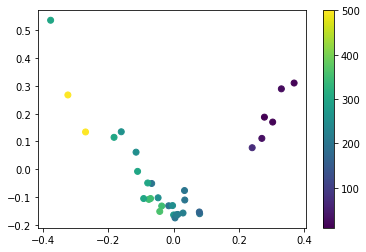

In [361]:
XS=df_scaled
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=20, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
im=ax.scatter(out[:, 0], out[:, 1],c=selec.Temp)
fig.colorbar(im, ax=ax)
#ax.set_ylim(0.15, -0.15);
#pretty much the same, PCA preserves info

In [377]:
ran=range(2,15)
bic=[]
for i in ran:
    gmm=GMM(i)
    gmm.fit(out)
    bic+=[gmm.bic(out)]

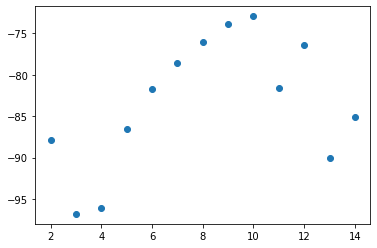

In [378]:
plt.scatter(ran,bic)

In [382]:
gmm=GMM(3)
gmm.fit(out)

GaussianMixture(n_components=3)

In [383]:
pred=gmm.predict(out)

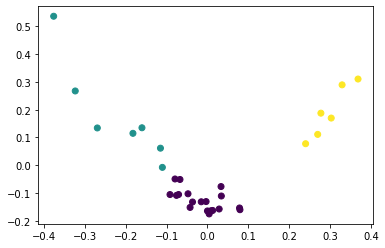

In [385]:
plt.scatter(out[:, 0], out[:, 1],c=pred)

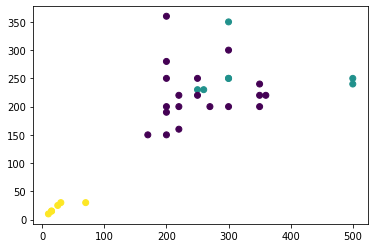

In [386]:
plt.scatter(selec.Temp,selec.T_CH3OH,c=pred)

In [387]:
selec['Groups']=pred

<ipython-input-387-1435d503fee9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selec['Groups']=pred


In [390]:
selec.to_csv('naomi_data_prediction.csv')

# ^^^^^^^^

In [339]:
XS=df_scaled

In [367]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(XS)
proj.shape

(32, 2)

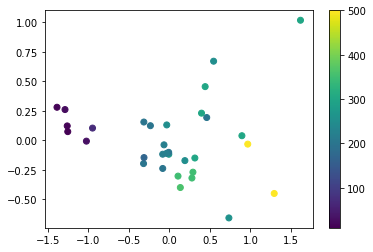

In [368]:
plt.scatter(proj[:, 0], proj[:, 1], c=selec.Temp)
plt.colorbar()